# Stopwords Removal

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [5]:
print(len(stopwords.words('english')))

198


In [7]:
text = "now we will tokenize this and then remove stopwords from that."
tokens = word_tokenize(text)
tokens

['now',
 'we',
 'will',
 'tokenize',
 'this',
 'and',
 'then',
 'remove',
 'stopwords',
 'from',
 'that',
 '.']

In [8]:
stop_words = stopwords.words('english')

In [9]:
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
filtered_tokens

['tokenize', 'remove', 'stopwords', '.']

# Stemming

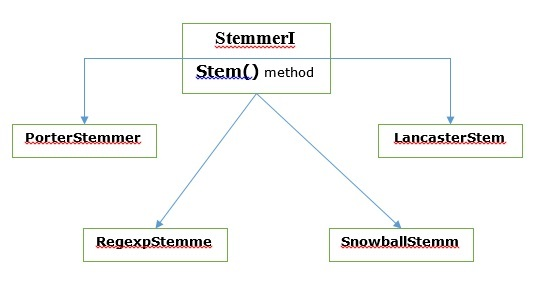

**1) PorterStemmer** -> It is simple, widley used but sometimes it gives inaccurate results like "easily" --> "easili"

In [1]:
import nltk

In [2]:
from nltk.stem import PorterStemmer

In [3]:
st = PorterStemmer()

In [4]:
words = ["running", "runner", "ran", "easily", " fairly"]
stemmed_words = [st.stem(word) for word in words]

stemmed_words

['run', 'runner', 'ran', 'easili', ' fairli']

**2) RegexpStemmer: It is Fully customizable, can used for multilanguage. But Regex patterns can fail for irregular words**

In [5]:
from nltk.stem import RegexpStemmer

Rst = RegexpStemmer('ing$|s$|e$|able$') #'$' --> Word ending with and '|' --> Or in Regex patterns

[Rst.stem(word) for word in words]


['runn', 'runner', 'ran', 'easily', ' fairly']

**3) SnowballStemmer: Often more accurate than Porter, supports multiple language.**

In [7]:
from nltk.stem import SnowballStemmer

sst = SnowballStemmer('english')
[sst.stem(word) for word in words]

['run', 'runner', 'ran', 'easili', ' fair']

In [9]:
#If we know the language specifically then we can do as below too
from nltk.stem.snowball import EnglishStemmer

engST = EnglishStemmer()
[engST.stem(word) for word in words]

['run', 'runner', 'ran', 'easili', ' fair']

**4) Lanchester or paice-husk stemmer:** 
- It is designed for speed, hence useful for large dataset.
- It uses more than 100 rules to reduce words to their base form, hence it can handle irregular words that other stemmer might miss.

In [2]:
%pip install stemming 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11147 sha256=c63a5165e1715621ea03df5f5b365d6e58dc159675f3a5bc97cd68438cdb8ce6
  Stored in directory: c:\users\ajink\appdata\local\pip\cache\wheels\20\d4\73\028ca44cd75949ad81250dd3ecea7e4c61b97672587b65ef35
Successfully built stemming
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
nltk.download('punkt_tab')

from stemming.paicehusk import stem
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ajink\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
text = "The cats are running swiftly."
words = word_tokenize(text)

stemmed_words = [stem(word) for word in words]
print(stemmed_words)

['The', 'cat', 'ar', 'run', 'swift', '.']


# Lemmatization

**pos_tag → WordNet POS**

| pas_tag | WordNet POS | Description                        |
|--------------|------------|------------------------------------|
| JJ           | a          | adjective                           |
| JJR          | a          | adjective, comparative             |
| JJS          | a          | adjective, superlative             |
| NN           | n          | noun, singular                     |
| NNS          | n          | noun, plural                       |
| NNP          | n          | proper noun, singular              |
| NNPS         | n          | proper noun, plural                |
| VB           | v          | verb, base form                    |
| VBD          | v          | verb, past tense                   |
| VBG          | v          | verb, gerund/present participle    |
| VBN          | v          | verb, past participle              |
| VBP          | v          | verb, non-3rd person singular present |
| VBZ          | v          | verb, 3rd person singular present  |
| RB           | r          | adverb                             |
| RBR          | r          | adverb, comparative                |
| RBS          | r          | adverb, superlative                |


In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("average_perceptron_tagger")
nltk.download("wordnet")

#nltk.download("omw-1.4") #OMW (Open Multilingual WordNet) provides translations and multilingual word relations linked to the English WordNet.

strg = "The children are running towards a better place."
words = word_tokenize(strg)
tags = nltk.pos_tag(words) 
# output=>
# [('running', 'VBG'),
#  ('runner', 'NN'),
#  ('ran', 'VBD'),
#  ('easily', 'RB'),
#  ('fairly', 'RB')]



# here pos_tag returns "NN" for noun but lemmetizer need "n" for noun. hence below function for that

def return_tags_as_needed(t):
    if t.startswith('J'):
        return 'a'  # adjective
    elif t.startswith('V'):
        return 'v'  # verb
    elif t.startswith('N'):
        return 'n'  # noun
    elif t.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default: WordNetLemmatizer will assume noun




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajink\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajink\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
lemmetizer = WordNetLemmatizer()
words_with_tag = nltk.pos_tag(words)
words_with_tag

[('The', 'DT'),
 ('children', 'NNS'),
 ('are', 'VBP'),
 ('running', 'VBG'),
 ('towards', 'IN'),
 ('a', 'DT'),
 ('better', 'JJR'),
 ('place', 'NN'),
 ('.', '.')]

In [24]:

lemmas = [lemmetizer.lemmatize(word, return_tags_as_needed(tag)) for word,tag in words_with_tag]
lemmas

['The', 'child', 'be', 'run', 'towards', 'a', 'good', 'place', '.']